<a href="https://colab.research.google.com/github/AgunsBaba/sales-prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
#check row and column length
df.shape

(8523, 12)

In [3]:
#Check column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#get descriptive stats
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#import visualization modules
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


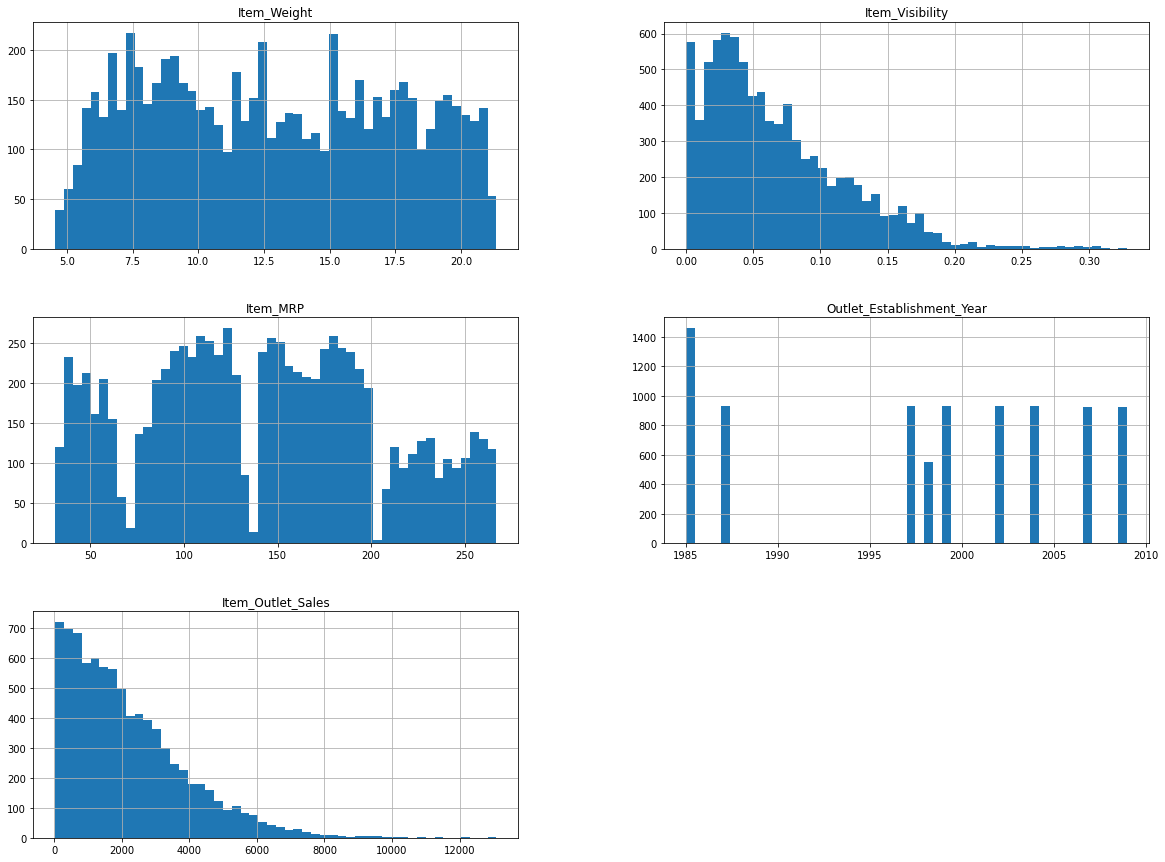

In [6]:
#show histogram of data to see the distribution of numeric variables
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#find duplicates

df_duplicated = df[df.duplicated()]
print(df_duplicated)

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


Nothing is duplicated

In [8]:
#Addressing missing value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
#fill the missing Item_Weight with the mean value of the column.
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [30]:
#check that all null values in Item_Weight have been filled
df['Item_Weight'].isnull().sum()

0

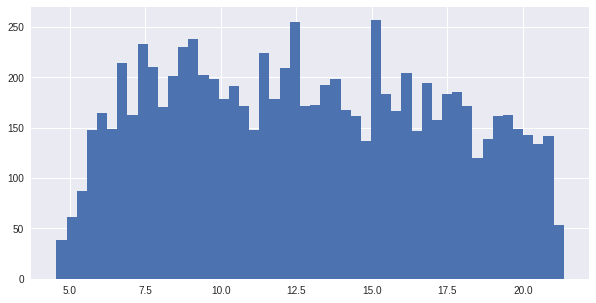

In [31]:
#check the distribution of the Item_Weight column after filling null values
df['Item_Weight'].hist(bins=50, figsize=(10,5))
plt.show()

In [33]:
#check value counts for the 'Outlet_Size'
df.Outlet_Size.value_counts()

Medium    3894
Small     3326
High      1303
Name: Outlet_Size, dtype: int64

Looking at the data, there are 3,894 medium stores and 3,326 small stores. It is therefore probably true that the null values in the Outlet_Size columns are for High stores, since 2410 + 1303 = 3,713 a number which closely aligns with the number of medium and small stores

In [49]:
#Fill Outlet_Size null values 'High'
df['Outlet_Size'].fillna('High', inplace=True)

In [48]:
#check that all null values in Outlet_Size have been filled
df['Outlet_Size'].isnull().sum()

0

Result shows there are no more null values

In [50]:
#Get descriptive statistics of the 'cleaned' dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.066132,140.992782,1997.831867,2181.288914
std,4.445074,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.600000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [51]:
#histogram of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8522 to 5142
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


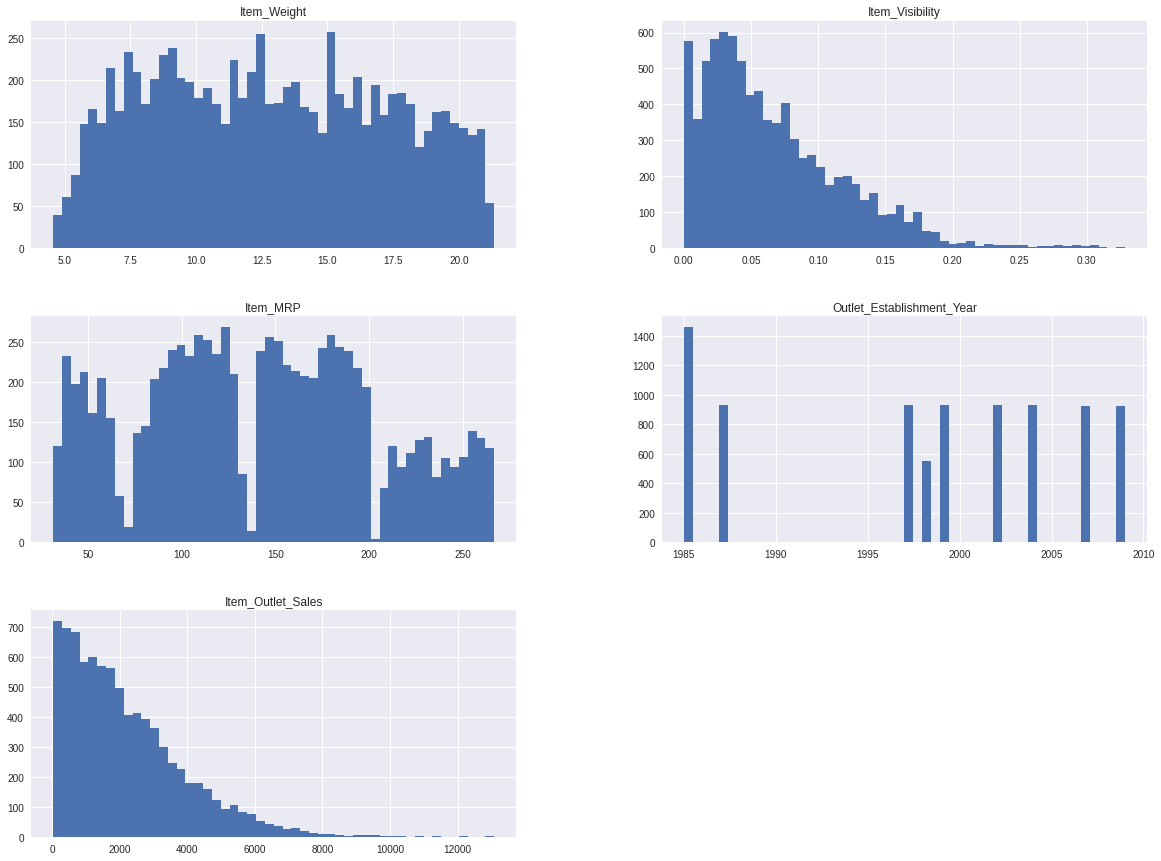

In [52]:
#show histogram of data to see the distribution of numeric variables
df.hist(bins=50, figsize=(20,15))
plt.show()

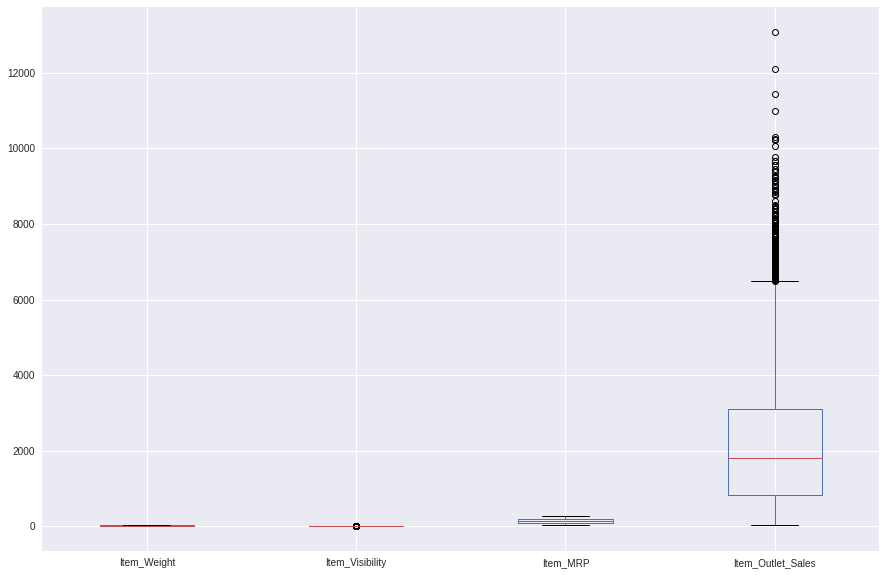

In [53]:
#boxplot
df.boxplot(column=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], figsize=(15,10))
plt.show()

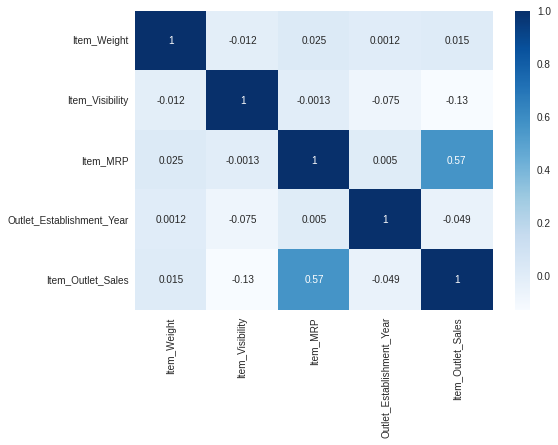

In [54]:
#correlation
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8522 to 5142
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [56]:
#plot item weight and fat content
total_sale_outlet = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
total_sale_outlet

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [57]:
#Put the Outlet and total sales in a list
outlet = list(total_sale_outlet.index)
sales = list((total_sale_outlet.values)/1000000)


Text(0.5, 1.0, 'Total Sales by Outlet')

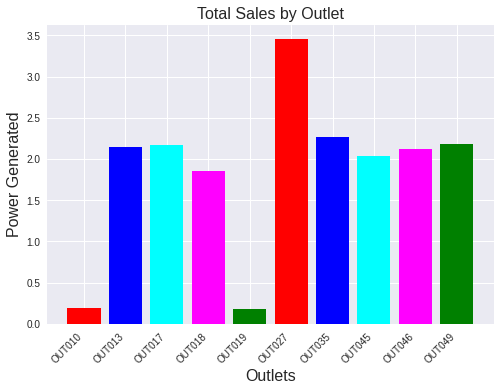

In [58]:
#create a bar chart to view the total sales by outlet
plt.style.use('seaborn')
plt.bar(outlet, sales, color=['red', 'blue', 'cyan', 'magenta', 'green']) #make bars in different colors
plt.xticks(rotation=45, ha='right') #rotate x-axis markers
plt.xlabel('Outlets', fontsize=16) #create x-axis labels
plt.ylabel('Power Generated', fontsize=16) #create y-axis labels
plt.title('Total Sales by Outlet', fontsize=16) #create a title for the chart